<a href="https://colab.research.google.com/github/Anurag060718/Well-Logging/blob/main/Well_Logging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#inslataling libriry which are not in colab
!pip install lasio
!pip install mplstereonet

In [3]:
#import all the libriry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
# now additional libriry
import lasio
import mplstereonet
#import fracture# this is an in house libirary


In [4]:
#getting the data from the net
well_path= 'http://bit.ly/wireline-data'




In [5]:
#read LAS well log data
well = lasio.read(well_path)
# how to display mnemonics of the well log
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [6]:
# but the data is in the form of array and can not be used easly so we change it into a simple read able type
well.data# this is how we show the data

array([[4.93493134e+02,            nan, 1.94060001e+01, ...,
        1.54602885e+00,            nan, 1.54602885e+00],
       [4.93645538e+02,            nan, 1.94060001e+01, ...,
        1.57003009e+00,            nan, 1.57003009e+00],
       [4.93797943e+02,            nan, 1.94060001e+01, ...,
        1.59499407e+00,            nan, 1.59499407e+00],
       ...,
       [3.75226196e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75241431e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75256665e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00]])

In [7]:
# now if we want to change this form in data frame
well_df = well.df().reset_index()


In [8]:
# basics of looping
list_of_name =['a','b','c','d','e','f']
#for i in list_of_name:#this is the first methode
  #print(i)
#2 way of doing this
#for i in range(len(list_of_name)):
 #print(list_of_name[i])


In [9]:

#print(well.columns) LASFile' object has no attribute 'columns'

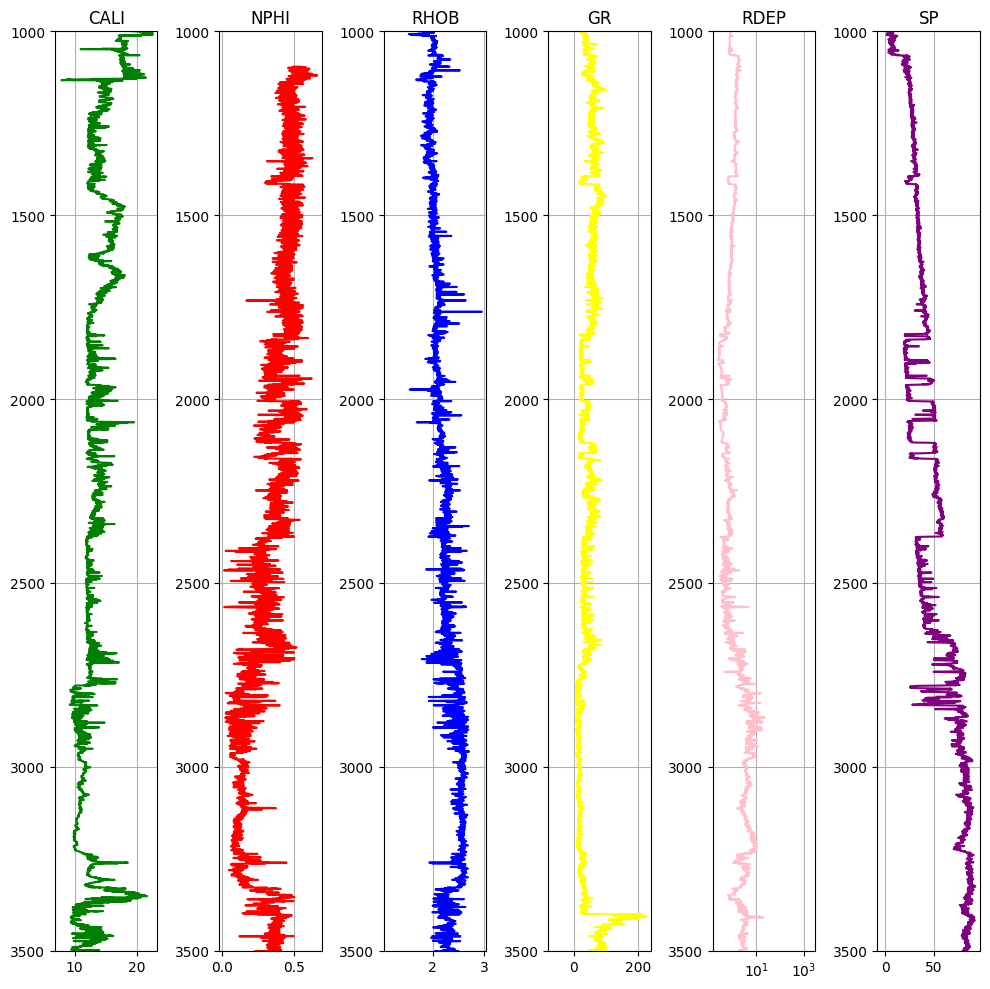

In [11]:
#visulization of the well log by using loop
### step-1 is to make a set of data we want to make log of
log =['CALI','NPHI','RHOB','GR','RDEP','SP']
color = ['green','red','blue','yellow','pink','purple']
plt.figure(figsize=(10,10))

for i in range(len(log)):
  plt.subplot(1,len(log),i+1)
  if log[i]=="RDEP":
    plt.semilogx(well[log[i]],well['DEPT'],color= color[i])
  else:
        plt.plot(well[log[i]],well['DEPT'],color= color[i])
  plt.title(log[i])
  plt.ylim(3500,1000)
  plt.grid()

plt.tight_layout()

plt.show()




In [ ]:
well_df.describe()

,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
count,21386.000000,9987.000000,21386.000000,21386.000000,17432.000000,21386.000000,21370.000000,21275.000000,2.127500e+04,21386.000000,21386.000000,21386.000000,2560.000000,21386.000000
mean,2123.029892,7.897867,13.645922,0.017594,0.319784,2.203518,44.654428,114.036763,3.484651e+07,3.017627,41.683784,4.393258,10.537590,4.393258
std,940.879476,4.610482,3.165606,0.049463,0.144542,0.224109,24.985221,31.132776,1.007088e+07,27.873898,27.143435,47.439828,64.787868,47.439828
min,493.493134,1.000000,7.555000,-1.352000,0.011723,1.141000,-64.813004,44.878983,1.296827e+07,0.229000,-3.414005,0.313028,0.346062,0.313028
25%,1308.261505,4.000000,11.945000,0.000000,0.173336,2.047000,25.202999,84.341122,2.500054e+07,0.696000,22.781849,0.815003,1.887500,0.815003
50%,2123.029785,11.000000,12.883000,0.015000,0.347667,2.166000,39.880457,118.446785,3.595644e+07,1.259124,36.068897,1.255987,4.215000,1.255987
75%,2937.798340,11.000000,16.063000,0.032000,0.448269,2.346000,62.149881,142.539207,4.378595e+07,2.522372,66.189140,2.923500,5.588000,2.923500
max,3752.566650,19.000000,22.608999,0.235000,0.661496,2.951000,226.238007,174.163071,5.282944e+07,2000.000000,92.864037,2000.000000,1652.531982,2000.000000


In [ ]:
#x = well_df['RHOB']
#y = well_df['DRHO']
#z = well_df['DEPT']

#fig = px.scatter_3d( well_df ,x='RHOB', y= 'DRHO',z='DEPT')
##fig.update_scenes(zaxis_autorange='reversed')
#fig.show()